# Lab 3 - Assignment 2 and related concepts

## 1. Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 2. Read data

### 2.1 Read from GitHub link

In [2]:
url_futures = 'https://raw.githubusercontent.com/vercammen/MFRE/master/fre501Assign2/canola_futures.csv'
canola = pd.read_csv(url_futures)
canola.head()

,date,contract,front_old,front_new,RSF16,RSH16,RSK16,RSN16,RSX16,RSF17,...,RSF24,RSH24,RSK24,RSN24,RSX24,RSF25,RSH25,RSK25,RSN25,RSX25
0,10/16/2015,RSF16,NaN,477.1,477.1,479.8,480.5,480.0,469.7,467.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/19/2015,RSF16,NaN,476.2,476.2,478.9,479.6,479.2,468.6,466.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/20/2015,RSF16,NaN,478.3,478.3,481.6,482.0,480.9,471.1,469.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/21/2015,RSF16,NaN,482.4,482.4,486.8,488.3,487.3,477.2,475.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/22/2015,RSF16,NaN,481.2,481.2,485.2,485.8,484.0,473.4,471.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Convert "date" column to "date" datatype

In [3]:
canola['date'] = pd.to_datetime(canola['date'])

In [4]:
canola.head()

,date,contract,front_old,front_new,RSF16,RSH16,RSK16,RSN16,RSX16,RSF17,...,RSF24,RSH24,RSK24,RSN24,RSX24,RSF25,RSH25,RSK25,RSN25,RSX25
0,2015-10-16,RSF16,NaN,477.1,477.1,479.8,480.5,480.0,469.7,467.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-10-19,RSF16,NaN,476.2,476.2,478.9,479.6,479.2,468.6,466.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-20,RSF16,NaN,478.3,478.3,481.6,482.0,480.9,471.1,469.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-21,RSF16,NaN,482.4,482.4,486.8,488.3,487.3,477.2,475.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-22,RSF16,NaN,481.2,481.2,485.2,485.8,484.0,473.4,471.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Data Processing 

Task: Find rows where the contract changes

In [5]:
# Identify if the contract column changes (True) or not (False)
changes = canola['contract'] != canola['contract'].shift()

# Select rows where the contract changes and assign to 'fwrd' df
fwrd = canola[changes].copy()
fwrd.head()

,date,contract,front_old,front_new,RSF16,RSH16,RSK16,RSN16,RSX16,RSF17,...,RSF24,RSH24,RSK24,RSN24,RSX24,RSF25,RSH25,RSK25,RSN25,RSX25
0,2015-10-16,RSF16,NaN,477.1,477.1,479.8,480.5,480.0,469.7,467.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,2015-12-02,RSH16,471.4,479.5,471.4,479.5,486.8,491.7,476.6,480.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,2016-02-10,RSK16,462.8,471.6,NaN,462.8,471.6,477.2,481.1,483.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,2016-04-12,RSN16,473.9,479.5,NaN,NaN,473.9,479.5,478.4,483.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,2016-06-02,RSX16,520.6,526.3,NaN,NaN,NaN,520.6,526.3,529.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.1 Shift() funtion

Q. What does shift() function do? <br>
A. Shift() moves the data along the specifies axis. The default is column-wise.

https://www.geeksforgeeks.org/python-pandas-dataframe-shift/

In [6]:
df = pd.DataFrame({
    "employee_ID": [101, 102, 103, 104],
    "age": [23, 45, 20, 34],
    "name": ["Amy", "Bob", "Catherine", "Jack"]
})

df.shift(axis=0)

,employee_ID,age,name
0,NaN,NaN,None
1,101.0,23.0,Amy
2,102.0,45.0,Bob
3,103.0,20.0,Catherine


In [7]:
# Remove the "front_old" and "front_new" columns and the RSF16 column (since March contract is featured)
fwrd = fwrd.drop(['front_old','front_new','RSF16'], axis=1)

# Reset the index to "contract"
fwrd.set_index('contract', inplace=True)
fwrd.head()

,date,RSH16,RSK16,RSN16,RSX16,RSF17,RSH17,RSK17,RSN17,RSX17,...,RSF24,RSH24,RSK24,RSN24,RSX24,RSF25,RSH25,RSK25,RSN25,RSX25
contract,,,,,,,,,,,,,,,,,,,,,
RSF16,2015-10-16,479.8,480.5,480.0,469.7,467.9,469.6,469.6,469.6,469.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RSH16,2015-12-02,479.5,486.8,491.7,476.6,480.3,480.3,480.3,480.3,480.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RSK16,2016-02-10,462.8,471.6,477.2,481.1,483.8,484.0,482.7,482.7,482.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RSN16,2016-04-12,NaN,473.9,479.5,478.4,483.2,485.0,485.3,485.5,477.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RSX16,2016-06-02,NaN,NaN,520.6,526.3,529.3,530.6,531.8,533.4,516.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Convert a dataframe into a CSV file

Syntax: df.to_csv('out.csv')  

In [8]:
fwrd.to_csv('data/fwrd.csv', index=True)  

## 6. Select columns and rows using loc() and iloc()

In [9]:
# Select a column
fwrd["RSH16"]

contract
RSF16    479.8
RSH16    479.5
RSK16    462.8
RSN16      NaN
RSX16      NaN
RSF17      NaN
RSH17      NaN
RSK17      NaN
RSN17      NaN
RSX17      NaN
RSF18      NaN
RSH18      NaN
RSK18      NaN
RSN18      NaN
RSX18      NaN
RSF19      NaN
RSH19      NaN
RSK19      NaN
RSN19      NaN
RSX19      NaN
RSF20      NaN
RSH20      NaN
RSK20      NaN
RSN20      NaN
RSX20      NaN
RSF21      NaN
RSH21      NaN
RSN21      NaN
RSX21      NaN
RSF22      NaN
RSH22      NaN
RSK22      NaN
RSN22      NaN
RSX22      NaN
RSF23      NaN
RSH23      NaN
RSK23      NaN
RSN23      NaN
RSX23      NaN
RSF24      NaN
RSH24      NaN
RSK24      NaN
RSN24      NaN
RSX24      NaN
Name: RSH16, dtype: float64

In [10]:
# Select a row using index (contract)
fwrd.loc["RSH16"]

date     2015-12-02 00:00:00
RSH16                  479.5
RSK16                  486.8
RSN16                  491.7
RSX16                  476.6
RSF17                  480.3
RSH17                  480.3
RSK17                  480.3
RSN17                  480.3
RSX17                  480.3
RSF18                  480.3
RSH18                    NaN
RSK18                    NaN
RSN18                    NaN
RSX18                    NaN
RSF19                    NaN
RSH19                    NaN
RSK19                    NaN
RSN19                    NaN
RSX19                    NaN
RSF20                    NaN
RSH20                    NaN
RSK20                    NaN
RSN20                    NaN
RSX20                    NaN
RSF21                    NaN
RSH21                    NaN
RSK21                    NaN
RSN21                    NaN
RSX21                    NaN
RSF22                    NaN
RSH22                    NaN
RSK22                    NaN
RSN22                    NaN
RSX22         

In [11]:
# Select a row and column
fwrd.loc["RSH16", "date"]

Timestamp('2015-12-02 00:00:00')

In [12]:
# Select a range of rows and columns
fwrd.loc["RSH16":"RSX19", "date":"RSH17"]

,date,RSH16,RSK16,RSN16,RSX16,RSF17,RSH17
contract,,,,,,,
RSH16,2015-12-02,479.5,486.8,491.7,476.6,480.3,480.3
RSK16,2016-02-10,462.8,471.6,477.2,481.1,483.8,484.0
RSN16,2016-04-12,NaN,473.9,479.5,478.4,483.2,485.0
RSX16,2016-06-02,NaN,NaN,520.6,526.3,529.3,530.6
RSF17,2016-10-19,NaN,NaN,NaN,504.4,511.4,515.5
RSH17,2016-12-15,NaN,NaN,NaN,NaN,518.6,525.6
RSK17,2017-02-08,NaN,NaN,NaN,NaN,NaN,524.0
RSN17,2017-04-10,NaN,NaN,NaN,NaN,NaN,NaN
RSX17,2017-06-05,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# To do the same using indexes
fwrd.iloc[1:5, 2:3]

,RSK16
contract,
RSH16,486.8
RSK16,471.6
RSN16,473.9
RSX16,NaN


In [14]:
fwrd.iloc[ :3, 2:]

,RSK16,RSN16,RSX16,RSF17,RSH17,RSK17,RSN17,RSX17,RSF18,RSH18,...,RSF24,RSH24,RSK24,RSN24,RSX24,RSF25,RSH25,RSK25,RSN25,RSX25
contract,,,,,,,,,,,,,,,,,,,,,
RSF16,480.5,480.0,469.7,467.9,469.6,469.6,469.6,469.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RSH16,486.8,491.7,476.6,480.3,480.3,480.3,480.3,480.3,480.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RSK16,471.6,477.2,481.1,483.8,484.0,482.7,482.7,482.7,482.7,482.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7. Plot in python

### 7.1 Using Pandas and matplotlib

In [15]:
fwrd16 = fwrd.loc['RSH16'].iloc[1:11]

<Axes: ylabel='Frequency'>

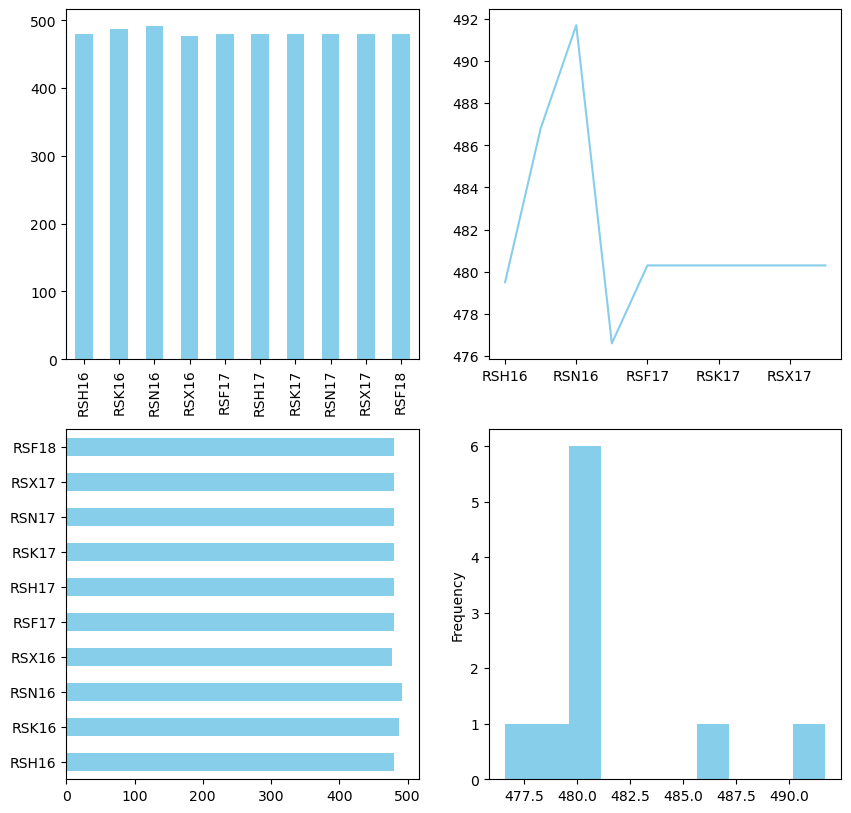

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fwrd16.plot(kind='bar', ax=axs[0, 0], color='skyblue')
fwrd16.plot(kind='line', ax=axs[0, 1], color='skyblue')
fwrd16.plot(kind='barh', ax=axs[1, 0], color='skyblue')
fwrd16.plot(kind='hist', ax=axs[1, 1], color='skyblue')

### 7.2 Plot with Altair

In [17]:
# Install altair
# pip install altair vega_datasets

In [18]:
import altair as alt

In [19]:
data = pd.DataFrame({
    'Contract': ['RSH16', 'RSK16', 'RSN16', 'RSX16', 'RSF17', 'RSH17', 'RSK17', 'RSN17', 'RSX17', 'RSF18'],
    'Price': [479.5, 486.8, 491.7, 476.6, 480.3, 480.3, 480.3, 480.3, 480.3, 480.3]
})

data

,Contract,Price
0,RSH16,479.5
1,RSK16,486.8
2,RSN16,491.7
3,RSX16,476.6
4,RSF17,480.3
5,RSH17,480.3
6,RSK17,480.3
7,RSN17,480.3
8,RSX17,480.3
9,RSF18,480.3


In [20]:
chart1 = alt.Chart(data).mark_bar().encode(
    x='Contract',
    y='Price',
    color=alt.value('skyblue') 
).properties(
    title='Price per Contract'
)

chart1

alt.Chart(...)

In [21]:
# To make 2x2 grids

top_row = alt.hconcat(chart1, chart1)
bottom_row = alt.hconcat(chart1, chart1)
final_chart = alt.vconcat(top_row, bottom_row)

final_chart

alt.VConcatChart(...)